In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Data Generation

In [ ]:
import random
import pandas as pd

def simulate_patient():
    # History
    #history = random.choice(['Tinnitus Handicap Inventory', 'Tinnitus Questionnaire', 'Case History Questionnaire', 'Tinnitus Severity Grading (E.Biesinger)'])

    # Self-performed Questionnaires
    #questionnaire = 'Yes' if random.random() < 0.7 else 'No'  # Assuming 70% answer 'Yes'

    # Clinical Examination and Audiological Measurements
    #clinical_examination = random.choice(['Otoscopy', 'Cranio-mandibular & Neck examination', 'Auscultations'])
    #audiological_measurement = random.choice(['Audiometry', 'Psychophysical measurements', 'Tympanometry', 'Tubal impedance-manometry', 'Distortion product OAE'])

    # Tinnitus Type & Symptoms
    tinnitus_type = random.choice(['Pulsatile', 'Non-Pulsatile'])
    arterial, venous, vertigo, headache,paroxysmal, hearing_loss,psychiatric, sensory_neural = 0, 0, 0, 0, 0, 0, 0, 0
    if tinnitus_type == 'Pulsatile':
        arterial_venous = random.choice(['Arterial', 'Venous'])
        arterial = 1 if arterial_venous == 'Arterial' else 0
        venous = 1 if arterial_venous == 'Venous' else 0
        next_steps = 'Cardiovascular examination & Echo-doppler & Angiography & Angio-MRI & Blood test'
    else:
        symptom_type = random.choice(['Acute Tinnitus with sudden hearing loss', 'Constant', 'Vertigo', 'Paroxysmal', 'Sensory neural Hearing Loss', 'Headache', 'Psychiatric', 'Somatosensory tinnitus of the Neck and TMJ', 'Posttraumatic tinnitus'])
        if symptom_type == 'Vertigo':
            vertigo = 1
            next_steps = 'MRI & VEMP & BAEP & Electro cochleography'
        elif symptom_type == "Paroxysmal":
            paroxysmal = 1
            next_steps = "EEG & MRI & BAEP"
        elif symptom_type =="Acute Tinnitus with sudden hearing loss":
            hearing_loss =1
            next_steps = 'Acute Treatment'
        elif symptom_type == 'Headache':
            headache = 1
            next_steps = 'MRI & Furosemide test & Lumbar Puncture'
        elif symptom_type == 'Psychiatric':
            psychiatric = 1
            next_steps = 'Psych. Exam.'
        elif symptom_type == "Sensory neural Hearing Loss":
            sensory_neural = 1
            next_steps = "OAE & MRI & BAEP & Blood test"
        else:
            # Other non-pulsatile tinnitus types have specific next steps, but for simplicity we'll generalize here:
            next_steps = 'Various next steps based on tinnitus subtype'

    # Severity, Examination and Measurements Results
    severity = random.choice(['Moderate', 'Severe', 'Mild'])
    otoscopy = random.choice([0, 1])
    cranio_exam = 0 if otoscopy == 1 else 1
    auscultations = random.choice([0, 1])
    tympanometry = random.choice([0, 1])

    '''return [history, questionnaire, clinical_examination, audiological_measurement,hearing_loss,
            paroxysmal,tinnitus_type, arterial, venous, vertigo, headache, psychiatric, sensory_neural,
            severity, otoscopy, cranio_exam, auscultations, tympanometry, next_steps]'''
    return [hearing_loss,
            paroxysmal,tinnitus_type, arterial, venous, vertigo, headache, psychiatric, sensory_neural,
            severity, otoscopy, cranio_exam, auscultations, tympanometry, next_steps]

# Generate Dataset
num_patients = 1000
data = [simulate_patient() for _ in range(num_patients)]

# Convert to DataFrame
columns = ['hearing_loss',
           'paroxysmal','tinnitus_type', 'arterial', 'venous', 'vertigo', 'headache', 'psychiatric', 'sensory_neural',
           'severity', 'otoscopy', 'cranio_exam', 'auscultations', 'tympanometry', 'next_steps']



In [ ]:

df1 = pd.DataFrame(data, columns=columns)

# Save to CSV (optional)
df1.to_csv('simulated_tinnitus_data.csv', index=False)

In [ ]:
import pandas as pd
df1 = pd.read_csv('simulated_tinnitus_data.csv')
# Finding unique rows
unique_rows = df1.drop_duplicates()

print(unique_rows.shape)

(199, 15)


In [ ]:
unique_rows

,hearing_loss,paroxysmal,tinnitus_type,arterial,venous,vertigo,headache,psychiatric,sensory_neural,severity,otoscopy,cranio_exam,auscultations,tympanometry,next_steps
0,0,0,Non-Pulsatile,0,0,1,0,0,0,Severe,0,1,0,1,MRI & VEMP & BAEP & Electro cochleography
1,0,0,Pulsatile,0,1,0,0,0,0,Mild,1,0,0,1,Cardiovascular examination & Echo-doppler & An...
2,0,0,Pulsatile,1,0,0,0,0,0,Mild,1,0,0,0,Cardiovascular examination & Echo-doppler & An...
3,0,0,Pulsatile,0,1,0,0,0,0,Severe,0,1,1,0,Cardiovascular examination & Echo-doppler & An...
4,1,0,Non-Pulsatile,0,0,0,0,0,0,Severe,1,0,1,1,Acute Treatment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,0,Non-Pulsatile,0,0,1,0,0,0,Moderate,0,1,0,0,MRI & VEMP & BAEP & Electro cochleography
914,0,0,Non-Pulsatile,0,0,0,0,1,0,Moderate,1,0,1,1,Psych. Exam.
940,0,0,Non-Pulsatile,0,0,1,0,0,0,Severe,0,1,1,0,MRI & VEMP & BAEP & Electro cochleography
953,0,0,Non-Pulsatile,0,0,0,0,1,0,Severe,0,1,1,1,Psych. Exam.


### EDA

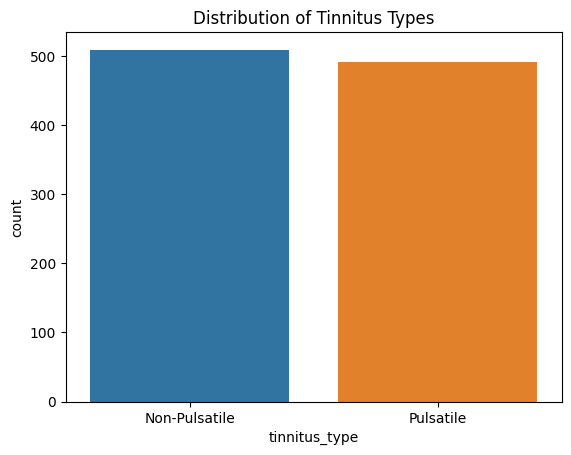

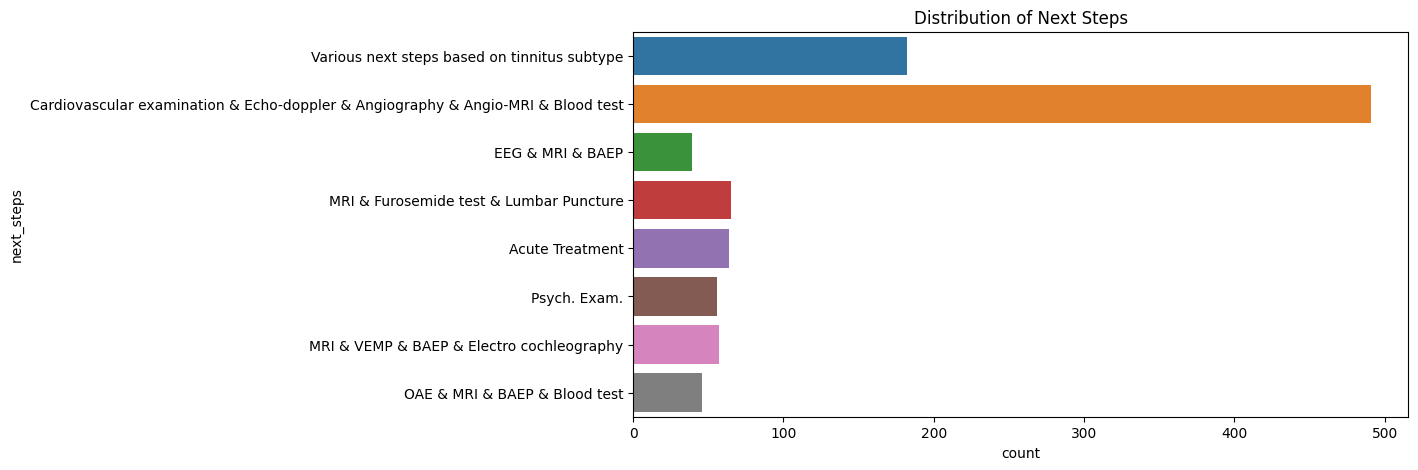

<ipython-input-6-b24c82403023>:41: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


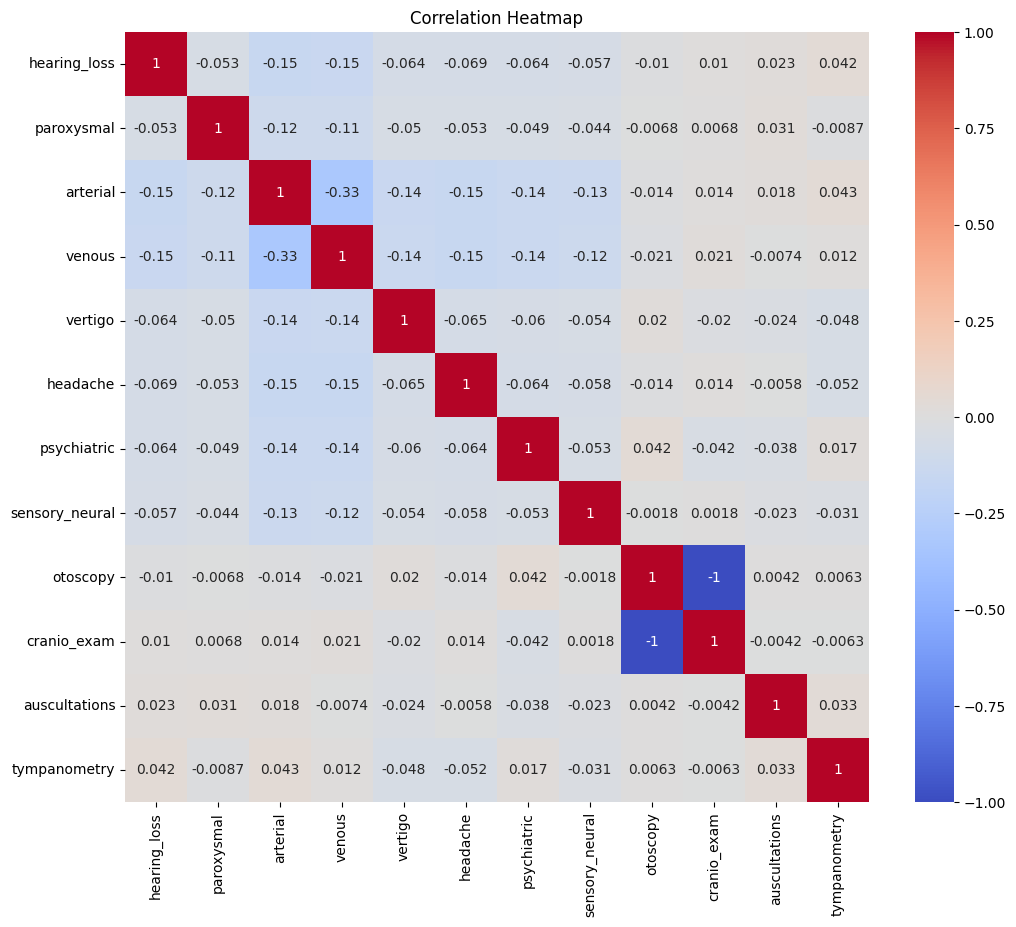

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the simulate_patient function is already defined

# Generate Dataset
num_patients = 1000
data = [simulate_patient() for _ in range(num_patients)]

# Convert to DataFrame
columns = ['hearing_loss',
           'paroxysmal','tinnitus_type', 'arterial', 'venous', 'vertigo', 'headache', 'psychiatric', 'sensory_neural',
           'severity', 'otoscopy', 'cranio_exam', 'auscultations', 'tympanometry', 'next_steps']
df1 = pd.DataFrame(data, columns=columns)

# EDA
# 1. Distribution of Tinnitus Types
sns.countplot(x='tinnitus_type', data=df1)
plt.title('Distribution of Tinnitus Types')
plt.show()
'''
# 2. Distribution of History Severity Grading
sns.countplot(x='history', data=df1)
plt.title('Distribution of History Severity Grading')
plt.show()'''
'''
# 3. Distribution of Clinical Examinations
sns.countplot(x='clinical_examination', data=df1)
plt.title('Distribution of Clinical Examinations')
plt.show()'''

# 4. Distribution of Next Steps
plt.figure(figsize=(10,5))
sns.countplot(y='next_steps', data=df1)
plt.title('Distribution of Next Steps')
plt.show()

# 5. Correlation Heatmap
corr = df1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# More EDA can be added based on specific interests and questions!


### Model Training

In [ ]:
import pandas as pd
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming the simulate_patient function is already defined

# Generate Dataset


#num_patients = 1000
#data = [simulate_patient() for _ in range(num_patients)]

# Convert to DataFrame
columns = ['hearing_loss',
           'paroxysmal','tinnitus_type', 'arterial', 'venous', 'vertigo', 'headache', 'psychiatric', 'sensory_neural',
           'severity', 'otoscopy', 'cranio_exam', 'auscultations', 'tympanometry', 'next_steps']
#df = pd.DataFrame(data, columns=columns)

# Data Preprocessing
# Convert categorical variables to numerical ones using one-hot encoding
df1 = pd.get_dummies(df1, columns=['tinnitus_type', 'severity'])

# Splitting the data into training and test sets
X = df1.drop('next_steps', axis=1)
y = df1['next_steps']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print(classification_report(y_test, y_pred))


Accuracy: 100.00%
                                                                                  precision    recall  f1-score   support

                                                                 Acute Treatment       1.00      1.00      1.00        22
Cardiovascular examination & Echo-doppler & Angiography & Angio-MRI & Blood test       1.00      1.00      1.00       151
                                                                EEG & MRI & BAEP       1.00      1.00      1.00         9
                                         MRI & Furosemide test & Lumbar Puncture       1.00      1.00      1.00        24
                                       MRI & VEMP & BAEP & Electro cochleography       1.00      1.00      1.00        18
                                                   OAE & MRI & BAEP & Blood test       1.00      1.00      1.00        11
                                                                    Psych. Exam.       1.00      1.00      1.00        16
     

## Data Augmentation:

In [ ]:
df1.head(2)

,hearing_loss,paroxysmal,arterial,venous,vertigo,headache,psychiatric,sensory_neural,otoscopy,cranio_exam,auscultations,tympanometry,next_steps,tinnitus_type_Non-Pulsatile,tinnitus_type_Pulsatile,severity_Mild,severity_Moderate,severity_Severe
0,0,0,0,0,0,0,0,0,1,0,0,1,Various next steps based on tinnitus subtype,1,0,0,0,1
1,0,0,1,0,0,0,0,0,0,1,1,0,Cardiovascular examination & Echo-doppler & An...,0,1,0,1,0


In [ ]:
df1.shape

(1000, 18)

In [ ]:
def augment_patient(patient):
    # Feature Perturbation
    '''if random.random() < 0.05:
        patient[0] = random.choice(['Tinnitus Handicap Inventory', 'Tinnitus Questionnaire', 'Case History Questionnaire', 'Tinnitus Severity Grading (E.Biesinger)'])
    if random.random() < 0.05:
        patient[2] = random.choice(['Otoscopy', 'Cranio-mandibular & Neck examination', 'Auscultations'])
    if random.random() < 0.05:
        patient[3] = random.choice(['Audiometry', 'Psychophysical measurements', 'Tympanometry', 'Tubal impedance-manometry', 'Distortion product OAE'])'''

    # Noise Injection
    if random.random() < 0.05:
        patient[6] = 1 if patient[6] == 0 else 0  # Invert venous
    if random.random() < 0.05:
        patient[7] = 1 if patient[7] == 0 else 0  # Invert vertigo
    if random.random() < 0.05:
        patient[8] = 1 if patient[8] == 0 else 0  # Invert headache
    if random.random() < 0.05:
        patient[9] = 1 if patient[9] == 0 else 0  # Invert psychiatric
    if random.random() < 0.05:
        patient[10] = 1 if patient[10] == 0 else 0  # Invert psychiatric

    return patient


def synthetic_patient(patient1, patient2):
    new_patient = []
    for i in range(len(patient1)):
        new_patient.append(random.choice([patient1[i], patient2[i]]))
    return new_patient


def data_augmentation(data, n_samples=1000):
    augmented_data = []
    for _ in range(n_samples):
        operation = random.choice(['augment', 'synthetic'])
        if operation == 'augment':
            patient = random.choice(data)
            augmented_data.append(augment_patient(patient.copy()))
        else:
            patient1, patient2 = random.sample(data, 2)
            augmented_data.append(synthetic_patient(patient1, patient2))

    return augmented_data + data


augmented_data = data_augmentation(data, n_samples=500)  # Create 500 new samples
df = pd.DataFrame(augmented_data, columns=columns)


df['severity'] = df['severity'].replace(0, "Mild")


In [ ]:
df['severity'].value_counts()

Mild        558
Moderate    476
Severe      466
Name: severity, dtype: int64

In [ ]:

df.to_csv('final_tinnitus_data.csv', index=False)

In [ ]:
df.columns

Index(['hearing_loss', 'paroxysmal', 'tinnitus_type', 'arterial', 'venous',
       'vertigo', 'headache', 'psychiatric', 'sensory_neural', 'severity',
       'otoscopy', 'cranio_exam', 'auscultations', 'tympanometry',
       'next_steps'],
      dtype='object')

### Model Training with the augmented data+original data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets (80% train, 20% test)

df = pd.get_dummies(df, columns=['tinnitus_type', 'severity'])

# Splitting the data into training and test sets
X = df.drop('next_steps', axis=1)
y = df['next_steps']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForest classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 90.67%


In [ ]:
df.columns

Index(['hearing_loss', 'paroxysmal', 'arterial', 'venous', 'vertigo',
       'headache', 'psychiatric', 'sensory_neural', 'otoscopy', 'cranio_exam',
       'auscultations', 'tympanometry', 'next_steps',
       'tinnitus_type_Non-Pulsatile', 'tinnitus_type_Pulsatile',
       'severity_Mild', 'severity_Moderate', 'severity_Severe'],
      dtype='object')

In [ ]:
df.shape

(1500, 18)

Random Data Generator

In [ ]:
new_patient_record = simulate_patient()
test_data = pd.DataFrame([new_patient_record], columns=columns)
test_data
# Just the input features without the 'next_steps'
test_features = test_data.drop('next_steps', axis=1)
print("Generated Test Data:\n", test_features)


Generated Test Data:
    hearing_loss  paroxysmal tinnitus_type  arterial  venous  vertigo  \
0             0           0     Pulsatile         1       0        0   

   headache  psychiatric  sensory_neural severity  otoscopy  cranio_exam  \
0         0            0               0     Mild         1            0   

   auscultations  tympanometry  
0              0             0  


## Predicted Next Steps for the random record generated above:

In [ ]:
# Use pd.get_dummies on the test features
test_features_encoded = pd.get_dummies(test_features)

# Make sure the test features have the same columns as X_train
# Add missing columns with 0's
for col in X_train.columns:
    if col not in test_features_encoded.columns:
        test_features_encoded[col] = 0

# Ensure the order of columns in test data is the same as in training data
test_features_encoded = test_features_encoded[X_train.columns]

# Predict
predicted_next_steps = clf.predict(test_features_encoded)

print("Predicted Next Steps:", predicted_next_steps[0])


Predicted Next Steps: Cardiovascular examination & Echo-doppler & Angiography & Angio-MRI & Blood test


In [ ]:
test_features_encoded

,hearing_loss,paroxysmal,arterial,venous,vertigo,headache,psychiatric,sensory_neural,otoscopy,cranio_exam,auscultations,tympanometry,tinnitus_type_Non-Pulsatile,tinnitus_type_Pulsatile,severity_Mild,severity_Moderate,severity_Severe
0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0


In [ ]:
test_features_encoded.columns

Index(['hearing_loss', 'paroxysmal', 'arterial', 'venous', 'vertigo',
       'headache', 'psychiatric', 'sensory_neural', 'otoscopy', 'cranio_exam',
       'auscultations', 'tympanometry', 'tinnitus_type_Non-Pulsatile',
       'tinnitus_type_Pulsatile', 'severity_Mild', 'severity_Moderate',
       'severity_Severe'],
      dtype='object')

In [ ]:
# Mapping of 'Next Steps' to possible causes
next_steps_to_causes = {
    'Cardiovascular examination & Echo-doppler & Angiography & Angio-MRI & Blood test': [
        'Arteriovenous malformation',
        'Sinus thrombosis',
        'Aneurysm',
        'Glomus tumor',
        'Carotid stenosis',
        'BIH'
    ],
    'Acute Treatment':['Hearing loss can be treated by many ways'
    ],

    'EEG & MRI & BAEP': [
        'Epilepsy',
        'MVC',
        'Aud. nerve compression',
        'Myoclonus'
    ],
    'MRI & VEMP & BAEP & Electro cochleography': [
        'Otosclerosis',
        'Otitis',
        'Middle ear aplasia',
        'Eustachian tube dysfunction'
    ],
    'MRI & Furosemide test & Lumbar Puncture': [
        'BIH',
        'Chiari',
        'Space occupying lesion',
        'Basilar impression'
    ],
    'Psych. Exam.': [
        'Depression',
        'Anx. disorder',
        'Insomnia',
        'Somatoform disorder',
        'Suicidality'
    ],
    'OAE & MRI & BAEP & Blood test':['Noise Trauma', 'Chronic Hearing loss', 'Prevention'],
    'Imaging & functional exam. for: Neck TMJ': [
        'Disorders Neck TMJ'
    ],
    'Cran. + cerv. CT/MRI BAEP EEG Echo doppler Neck exam Psych. exam': [
        'PTSD',
        'Pertous bone fracture',
        'Ossicular chain disruption',
        'Posttraumatic epilepsy',
        'Carotid dissection',
        'Perilymphatic fistula',
        'Otic barotrauma',
        'Cochlear concussion'
    ]
    # Add other "Next Steps" as keys and their corresponding possible causes as lists.
}

# Assume the model predicts the following "Next Steps" (you can replace this with your model's prediction)
#predicted_next_steps = 'Cardiovascular examination & Echo-doppler & Angiography & Angio-MRI & Blood test'

# Printing the possible causes based on the predicted "Next Steps"
causes = next_steps_to_causes.get(predicted_next_steps[0], [])
print("Based on the predicted next steps, the possible causes are:")
for cause in causes:
    print("-", cause)


Based on the predicted next steps, the possible causes are:
- Arteriovenous malformation
- Sinus thrombosis
- Aneurysm
- Glomus tumor
- Carotid stenosis
- BIH


In [ ]:
#!pip install --upgrade scikit-learn

!pip show scikit-learn

Name: scikit-learn
Version: 1.3.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
import pickle


# Save the model to a pickle file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(clf, file)
